# Day 4  手写数字识别Exploring Hand-written Digits

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## 1. 加载并可视化手写数字

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

### 这份图像数据是一个三维矩阵:共有 1797 个样本，每张图像都是 8 像素 ×8 像素。对前 100 张图进行可视化

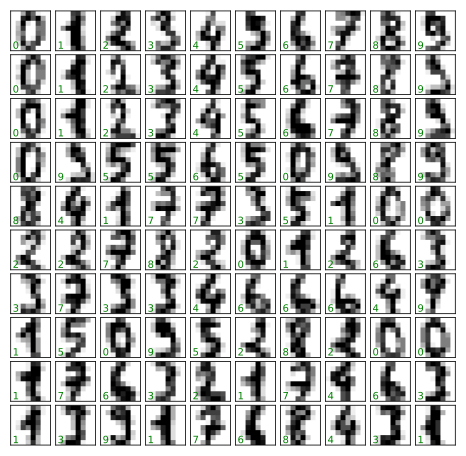

In [3]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
#gridspec_kw:Dict with keywords passed to the GridSpec constructor used to create the grid the subplots are placed on.
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

### 为了在Scikit-Learn中使用数据，需要一个维度为[n_samples, n_features]的二维特征矩 阵——可以将每个样本图像的所有像素都作为特征，也就是将每个数字的 8 像素 ×8 像素 平铺成长度为 64 的一维数组。另外，还需要一个目标数组，用来表示每个数字的真实值(标签)。这两份数据已经放在手写数字数据集的 data 与 target 属性中，直接使用即可

In [4]:
X = digits.data
X.shape

(1797, 64)

In [5]:
y = digits.target
y.shape

(1797,)

## 2. 无监督学习:降维

### 1797 个样本和 64 个特征。64维的数据明显不容易可视化，这次试试流形学习算法中的 Isomap算法对数据进行降维:
** ?? 64维降到2维？？**

In [6]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape # 准确性？？

(1797, 2)

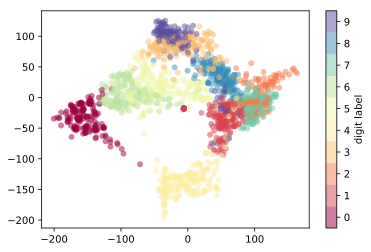

In [7]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
               edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10)) # spectral 已改为Spectral
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

### 由图可看出，好吧，这颜色和digital label能对应得上？ 只可意会...

## 3. 数字分类
### 对手写数字进行分类。和前面学习鸢尾花数据一样，先将数 据分成训练集和测试集，然后用高斯朴素贝叶斯模型来拟合:

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

### 准确性

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

### 准确率0.83，很不错，但是仅依靠这个指 标，我们无法知道模型哪里做得不够好，解决这个问题的办法就是用混淆矩阵(confusion matrix)。

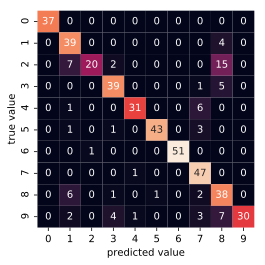

In [10]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

### 可见,不少2和8被误判为1,很多2被误判为8，一些9被误判为3
### 下一步，为了提高准确率，也许需要借助更加复杂的算法，例如支持向量机、随机森林或者其他分类算法。